In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files

In [3]:
print ("Please upload 'Dataset file csv format' file from kaggle")
uploaded = files.upload()

Please upload 'Dataset file csv format' file from kaggle


Saving student_performance_dataset.csv to student_performance_dataset.csv


In [4]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

In [5]:
print(df)

      student_id  gender  age  attendance  homework_completion  test_scores  \
0          10001    Male   17          78                   64           92   
1          10002    Male   18          85                   89           73   
2          10003    Male   15          70                   82           61   
3          10004  Female   17          65                   64           96   
4          10005  Female   18         100                   56           70   
...          ...     ...  ...         ...                  ...          ...   
9995       19996    Male   15          61                   64           65   
9996       19997  Female   16          73                   87           76   
9997       19998  Female   18          83                   50           69   
9998       19999    Male   14          94                   87           78   
9999       20000  Female   16          96                   81           95   

      participation  study_hours_per_week parental_

In [6]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [7]:
target_column = 'performance'
X = df.drop(target_column, axis=1)
y = df[target_column]

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [10]:
params = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [11]:
y_pred = best_model.predict(X_test)

In [12]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.9516666666666667
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1667
           1       0.97      0.92      0.94      1333

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000

🧱 Confusion Matrix:
 [[1630   37]
 [ 108 1225]]


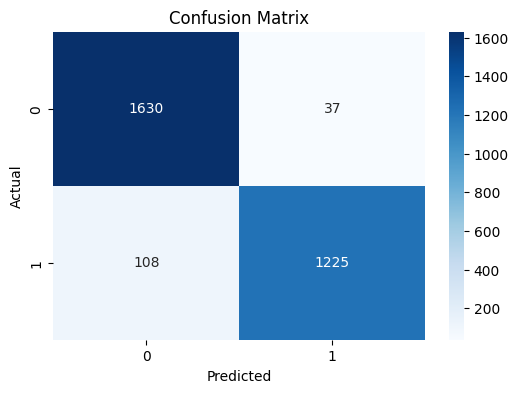

In [13]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/tmp/ipython-input-14-1436183502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features[indices], palette="coolwarm")
/tmp/ipython-input-14-1436183502.py:8: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


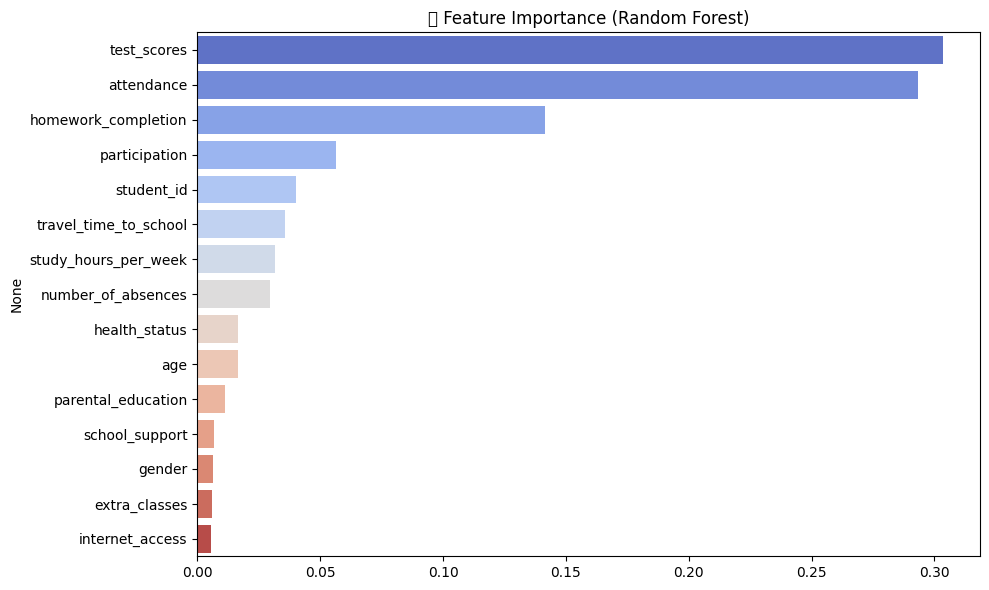

In [14]:
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices], palette="coolwarm")
plt.title('🎯 Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-15-3827417241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="Set2")


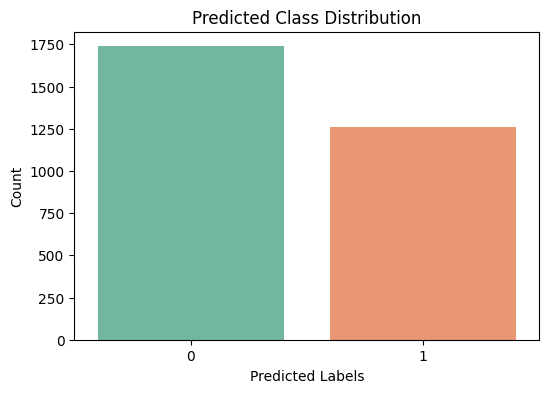

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_pred, palette="Set2")
plt.title("Predicted Class Distribution")
plt.xlabel("Predicted Labels")
plt.ylabel("Count")
plt.show()

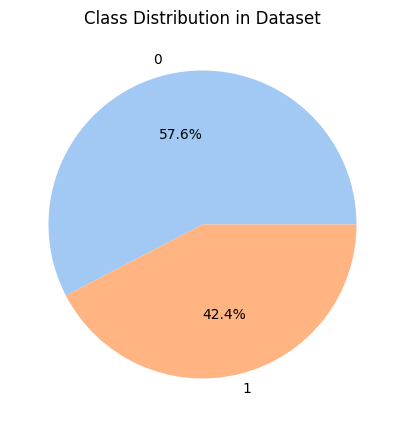

In [16]:
unique_classes, class_counts = np.unique(y, return_counts=True)
plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=unique_classes, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Class Distribution in Dataset")
plt.show()

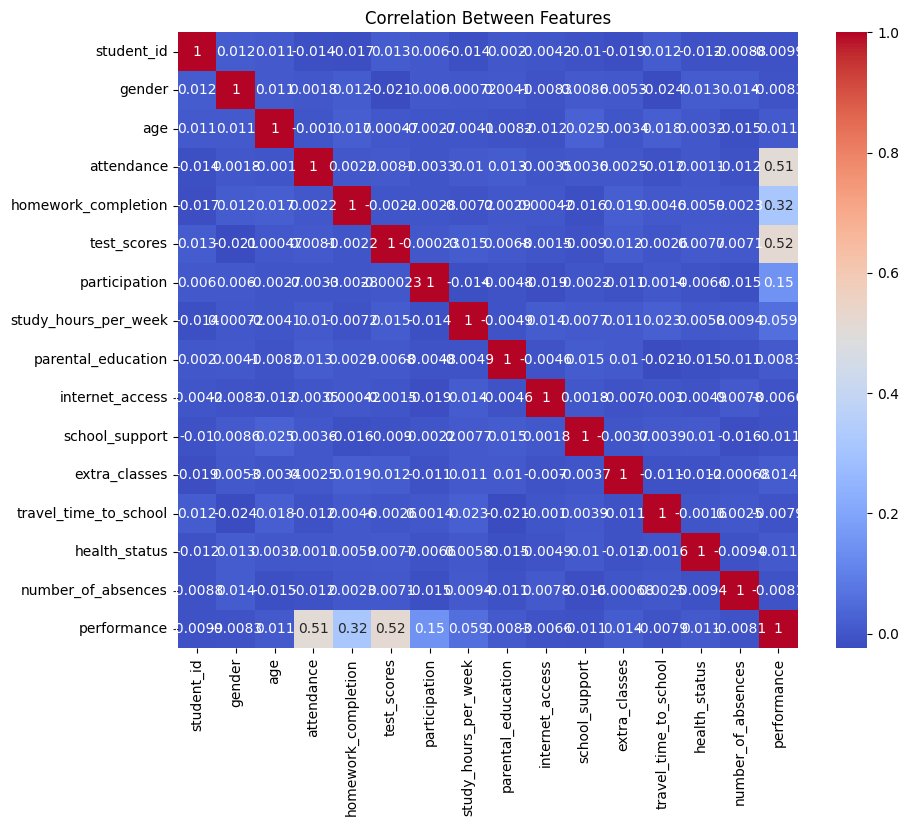

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()